In [80]:
# !pip install pandas
# !pip install matplotlib
# !pip install geopandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import geopandas as gpd

In [3]:
df = pd.read_csv("./csv/경상남도총인구수(2025).csv", encoding = "EUC-KR", skiprows = 2)
df.columns = ["시군구","인구수"]
df = df.sort_values(by = "인구수", ascending = False)

In [4]:
fm.fontManager.addfont(path = "./font/NanumGothic.ttf")
matplotlib.rcParams["font.family"] = "NanumGothic"

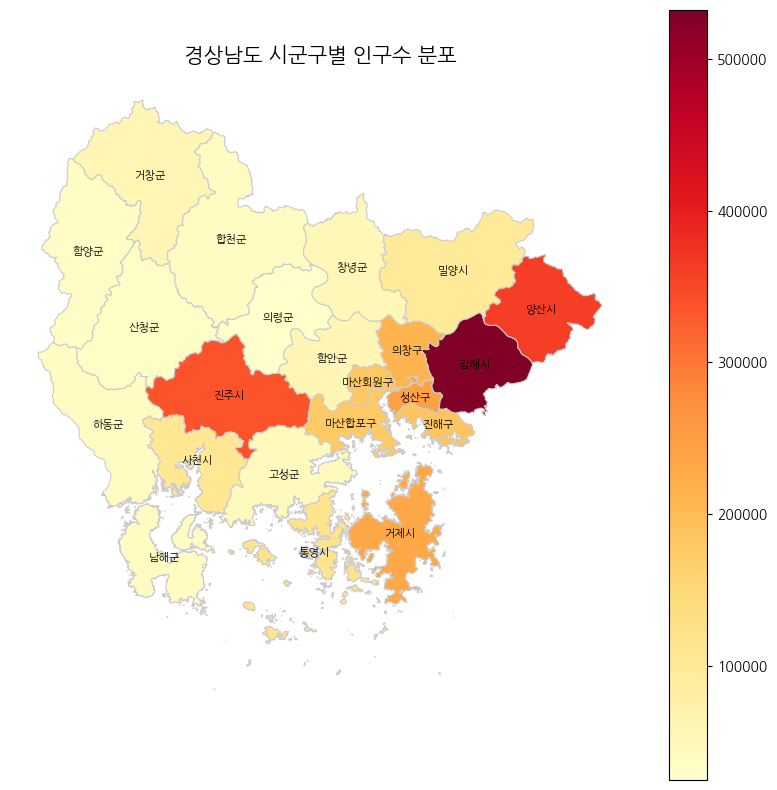

In [5]:
gdf = gpd.read_file("./shp/경상남도_시군구.shp")
for i in range(len(gdf["SIG_KOR_NM"])):
    gdf.loc[i, "SIG_KOR_NM"] = gdf.loc[i, "SIG_KOR_NM"].replace("창원시 ", "")
    
merged = gdf.merge(df, left_on = "SIG_KOR_NM", right_on = "시군구")
fig, ax = plt.subplots(figsize = (10, 10))
merged.plot(
    column = "인구수",
    cmap = "YlOrRd",
    linewidth = 0.8,
    ax = ax,
    edgecolor = "0.8",
    legend = True
)
for i, row in gdf.iterrows():
    # print(i, row)
    center = row["geometry"].centroid
    ax.text(center.x, center.y, row["SIG_KOR_NM"], fontsize = 8, ha = "center", va = "center", color = "black")
plt.title("경상남도 시군구별 인구수 분포", fontsize = 15)
plt.axis("off")
plt.savefig("./img/peoplemap.png")
plt.show()

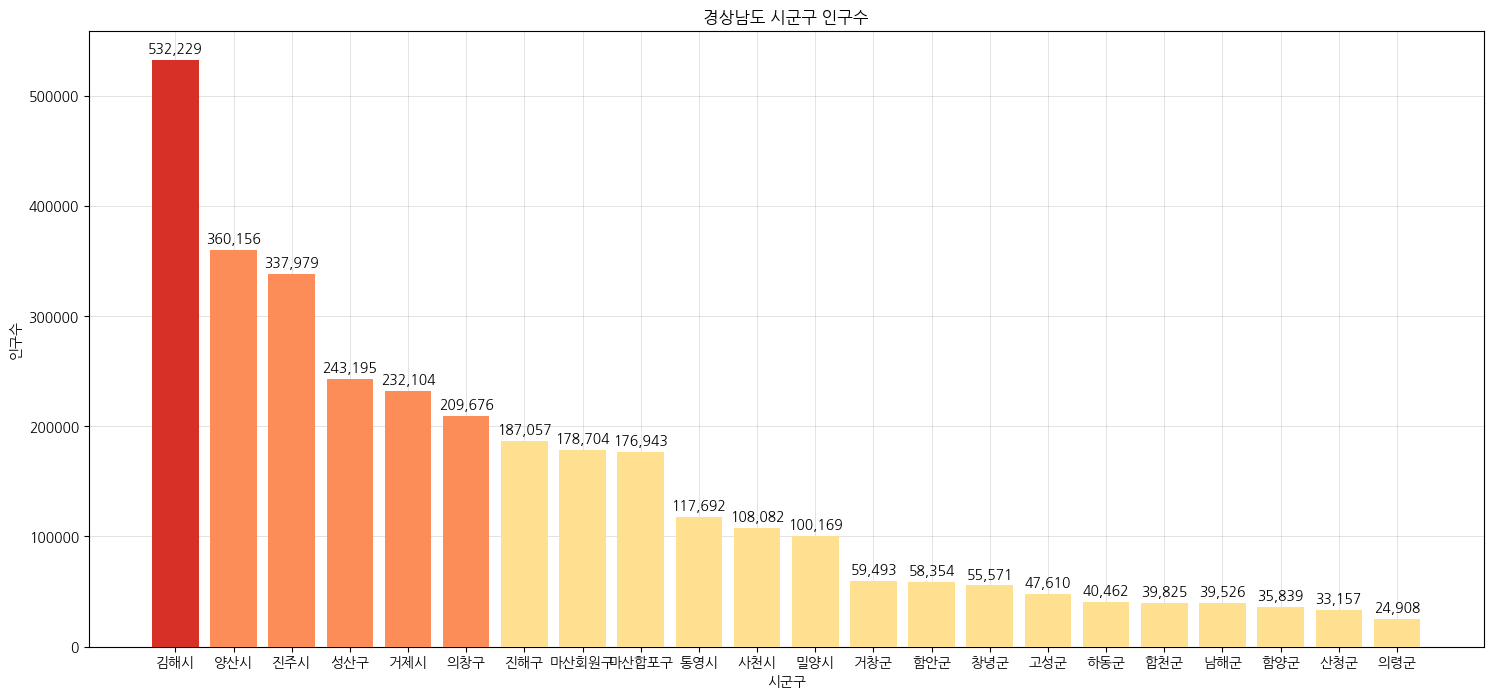

In [138]:
colors = ['#d73027' if v >= 500000 else '#fc8d59' if v >= 200000 else '#fee090' for v in df["인구수"]]

plt.figure(figsize = (18,8))
plt.bar(x = df["시군구"], height = df["인구수"], zorder = 3, color = colors)

for i, value in enumerate(df["인구수"]):
    plt.text(i, value + 10000, f'{value:,}', ha = "center", va = "center")
    
plt.title("경상남도 시군구 인구수")
plt.xlabel("시군구")
plt.ylabel("인구수")
plt.grid(True, zorder = 0, linewidth = 0.5, alpha = 0.5)
plt.savefig("./img/peoplebar.png")
plt.show()